In [89]:
## Exercise with the wine dataset from sklearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


In [29]:
#load the data

#data = pd.DataFrame([load_wine()])
data = load_wine()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [31]:
# Create a target column with the dataset target
wine_target = data.target
wine_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [32]:
# print the target_names
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [41]:
# print the first 5 rows of the dataset
data.data[:5]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02]])

In [62]:
#make sure that the columns have the correct label
data.keys()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [66]:
#print the shape of the dataset
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target
np.shape(df) 

(178, 14)

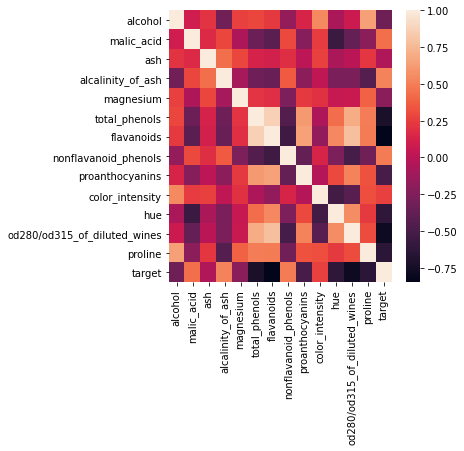

In [61]:
#evaluate features for correlations
plt.figure(figsize=(5,5))
sns.heatmap(df.corr())
plt.show()

In [63]:
#choose features from heat plot
features = ['alcalinity_of_ash', 'total_phenols', 'flavanoids', 'hue', 'proline', 'od_of_diluted_wines']

In [86]:
df.rename(columns = {"od280/od315_of_diluted_wines" : "od_of_diluted_wines"}, inplace = True)

#set X to features and y to target
X = np.array(df[features])
y = np.array(df["target"])

In [125]:
#split train and test data with 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state = 0)

In [126]:
#normalize fetures
X_train = normalize(X_train)
X_test = normalize(X_test)

In [137]:
#Now, we classify with a Random forest
# I had some trouble with this overfitting to a score of 1.0
# max_depth = 3 retricts the model a bit and prevents overfitting to the training data.
rfc = RandomForestClassifier(random_state=99, max_depth = 3)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=99)

In [138]:
print('Training Score: {}'.format(rfc.score(X_train, y_train)))
print('Testing Score: {}'.format(rfc.score(X_test, y_test)))


Training Score: 0.9577464788732394
Testing Score: 0.9722222222222222


## Pretty good, huh? 
- What if we want to use another [classifier from sklearn](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)?

In [139]:
########################################################
########################################################
#K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [140]:
print('Training Score: {}'.format(knn.score(X_train, y_train)))
print('Testing Score: {}'.format(knn.score(X_test, y_test)))

Training Score: 0.8802816901408451
Testing Score: 0.8888888888888888


In [155]:
########################################################
########################################################
#Support vector machines
svc = SVC(random_state=50, max_iter = 5)
svc.fit(X_train, y_train)

/home/tom/anaconda3/envs/ml-module/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC(max_iter=5, random_state=50)

In [156]:
print('Training Score: {}'.format(svc.score(X_train, y_train)))
print('Testing Score: {}'.format(svc.score(X_test, y_test)))

Training Score: 0.9295774647887324
Testing Score: 0.9722222222222222


In [159]:
########################################################
########################################################
#Naive Bayes Guassian
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [160]:
print('Training Score: {}'.format(gnb.score(X_train, y_train)))
print('Testing Score: {}'.format(gnb.score(X_test, y_test)))

Training Score: 0.9154929577464789
Testing Score: 0.9444444444444444
